Graded Project 3 - Python for DS

In [ ]:
#1. Import required libraries and read the dataset. (2)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score  
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler  ## to Normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('loan_approval_data.csv', encoding='unicode_escape')

In [24]:
#2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)

In [4]:
df.shape

(614, 13)

In [5]:
df.info

<bound method DataFrame.info of       loan_id  gender married dependents     education self_employed  \
0    lp001002    male      no          0      graduate            no   
1    lp001003    male     yes          1      graduate            no   
2    lp001005    male     yes          0      graduate           yes   
3    lp001006    male     yes          0  not graduate            no   
4    lp001008    male      no          0      graduate            no   
..        ...     ...     ...        ...           ...           ...   
609  lp002978  female      no          0      graduate            no   
610  lp002979    male     yes         3+      graduate            no   
611  lp002983    male     yes          1      graduate            no   
612  lp002984    male     yes          2      graduate            no   
613  lp002990  female      no          0      graduate           yes   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0               5849          

In [6]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [28]:
#3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

In [7]:
#Overview of the data
def data_overiew(df, message):
    print(f'{message}:\n')
    print("Data Features:")
    print(df.columns.tolist())
    print("\nMissing values %:\n", df.isnull().sum()/len(df)*100)
    print("\nMissing values:", df.isnull().sum().values.sum())
    
data_overiew(df, 'Overview of the dataset')

Overview of the dataset:

Data Features:
['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']

Missing values %:
 loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

Missing values: 149


In [8]:
df.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [9]:
df.dtypes

loan_id               object
gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [10]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
df.isnull().sum()/len(df)*100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

In [11]:
#df.fillna({'gender':'unknown','married':'unknown','self_employed':'unknown','credit_history':0}, inplace=True)
#cols=['dependents','loanamount','loan_amount_term']
#df[cols]=df[cols].fillna(df[cols].mean())

In [12]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,lp001011,male,yes,2,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y


In [13]:
print("Duplicate Records : ",len(df[df.duplicated()]))

Duplicate Records :  0


In [14]:
df=df.drop(columns=['loan_id','coapplicantincome'],axis=1)

In [15]:
df.dtypes

gender               object
married              object
dependents           object
education            object
self_employed        object
applicantincome       int64
loanamount          float64
loan_amount_term    float64
credit_history      float64
property_area        object
loan_status          object
dtype: object

#4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features 
and write your observations. (2)

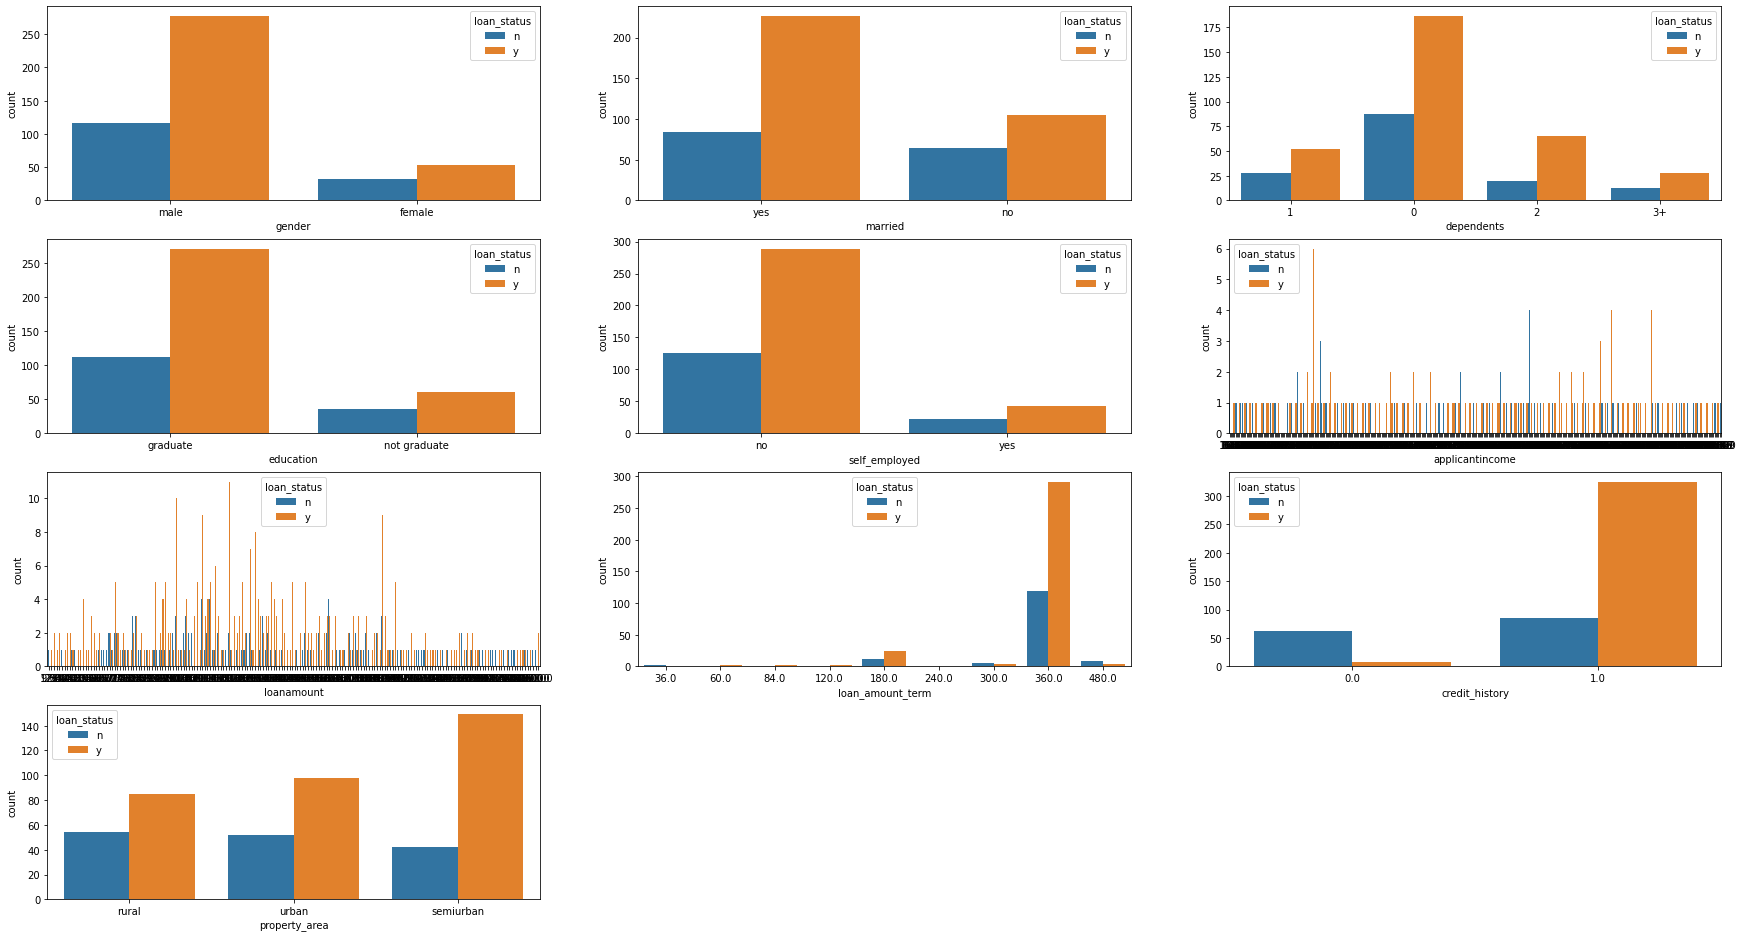

In [16]:
categorical_features=['gender','married','dependents','education','self_employed','applicantincome',
                     'loanamount','loan_amount_term','credit_history','property_area']
i=1
plt.figure(figsize=(30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='loan_status',data=df)
    i+=1

More Loans given to Self Employed Married Graduate Males having property at Semi Urban area having less dependents with high credit history.  

In [39]:
#5. Encode the categorical data. (2)

In [18]:
#unique values
cols = ['gender','married','education','self_employed','property_area','loan_status']

for col in cols:
    print("\n",col,df[col].unique())


 gender ['male' 'female']

 married ['yes' 'no']

 education ['graduate' 'not graduate']

 self_employed ['no' 'yes']

 property_area ['rural' 'urban' 'semiurban']

 loan_status ['n' 'y']


In [19]:
df['gender']=np.where(df['gender']=='male',1,0).astype(int)
df['married']=np.where(df['married']=='yes',1,0).astype(int)
df['education']=np.where(df['education']=='graduate',1,0).astype(int)
df['self_employed']=np.where(df['self_employed']=='yes',1,0).astype(int)
df['property_area']=np.where(df['property_area']=='rural',2,np.where(df['property_area']=='semiurban',1,0)).astype(int)
df['loan_status']=np.where(df['loan_status']=='y',1,0).astype(int)
df.head()

,gender,married,dependents,education,self_employed,applicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1,1,0,4583,128.0,360.0,1.0,2,0
2,1,1,0,1,1,3000,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,141.0,360.0,1.0,0,1
5,1,1,2,1,1,5417,267.0,360.0,1.0,0,1


In [ ]:
#6. Separate the target and independent features and split the data into train and test. (2)

In [20]:
#Separate the Target and Independent features
x=df.drop('loan_status', axis=1)
y=df['loan_status']

In [23]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(384, 10) (96, 10)
(384,) (96,)


In [ ]:
sc = StandardScaler()
X_std =  sc.fit_transform(x)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

In [46]:
#7. Build any classification model to predict the loan status of the customer and save your model using pickle. (3)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier


lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [29]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return accuracy

In [ ]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc],
                            ['Logistic Regression','Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest',
                            'Ada Boost', 'Gradient Boost', 'Stacking']):
    result.loc[model_name]=fit_n_print(model, X_train, X_test, y_train, y_test)

In [31]:
result

,Accuracy


Random Forest and Gradient Boost are giving 82.29% Accuracy

In [88]:
#from sklearn.ensemble import GradientBoostingClassifier

#gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

#gradient_booster.fit(X_train,y_train)

#print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.64      0.70        25
           1       0.88      0.93      0.90        71

    accuracy                           0.85        96
   macro avg       0.82      0.78      0.80        96
weighted avg       0.85      0.85      0.85        96



In [52]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [54]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.29


In [57]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))


In [ ]:
from flask import *
from flask import Flask, render_template, request, jsonify, redirect, url_for, session
import pickle
import numpy as np
import sklearn
from flask_mysqldb import MySQL
import MySQLdb.cursors
import re
 
app = Flask(__name__)
 
 
app.secret_key = 'your secret key'
 
app.config['MYSQL_HOST'] = 'localhost'
app.config['MYSQL_USER'] = 'root'
app.config['MYSQL_PASSWORD'] = 'root123'
app.config['MYSQL_DB'] = 'login_users'
 
mysql = MySQL(app)

model = pickle.load(open('model.pkl','rb'))

@app.route('/', methods=['GET'])
def home():
    return render_template('home.html')

@app.route('/login', methods =['GET', 'POST'])
def login():
    msg = ''
    if request.method == 'POST' and 'username' in request.form and 'password' in request.form:
        username = request.form['username']
        password = request.form['password']
        cursor = mysql.connection.cursor(MySQLdb.cursors.DictCursor)
        cursor.execute('SELECT * FROM loan_users WHERE userid = % s AND userpwd = % s', (username, password, ))
        account = cursor.fetchone()
        if account:
            session['loggedin'] = True
            session['id'] = account['id']
            session['username'] = account['userid'] 
            msg = 'Logged in successfully !'
            return render_template('predict.html', msg = msg)
        else:
            msg = 'Incorrect username / password !'
    return render_template('login.html', msg = msg)
 
@app.route('/logout')
def logout():
    session.pop('loggedin', None)
    session.pop('id', None)
    session.pop('username', None)
    return redirect(url_for('home'))
 
@app.route('/register', methods =['GET', 'POST'])
def register():
    msg = ''
    if request.method == 'POST' and 'username' in request.form and 'password' in request.form and 'email' in request.form :
        username = request.form['username']
        password = request.form['password']
        email = request.form['email']
        cursor = mysql.connection.cursor(MySQLdb.cursors.DictCursor)
        cursor.execute('SELECT * FROM loan_users WHERE userid = % s', (username, ))
        account = cursor.fetchone()
        if account:
            msg = 'Account already exists !'
        elif not re.match(r'[^@]+@[^@]+\.[^@]+', email):
            msg = 'Invalid email address !'
        elif not re.match(r'[A-Za-z0-9]+', username):
            msg = 'Username must contain only characters and numbers !'
        elif not username or not password or not email:
            msg = 'Please fill out the form !'
        else:
            cursor.execute('INSERT INTO loan_users VALUES (NULL, % s, % s, % s)', (username, password, email, ))
            mysql.connection.commit()
            msg = 'You have successfully registered !'
            return render_template('login.html', msg = msg)
    elif request.method == 'POST':
        msg = 'Please fill out the form !'
    return render_template('register.html', msg = msg)

@app.route("/predict", methods=['POST'])
def predict():
    if request.method == 'POST':
        Gender=int(request.form['Gender'])
        Married=int(request.form['Married'])
        Dependents=int(request.form['Dependents'])
        Education=int(request.form['Education'])
        Self_Employed=int(request.form['Self_Employed'])
        Income=float(request.form['Income'])
        Loan_Amount=float(request.form['Loan_Amount'])
        Loan_Term=int(request.form['Loan_Term'])
        Credit_History=int(request.form['Credit_History'])
        Property_Area=int(request.form['Property_Area'])
        
        prediction=model.predict([[Gender,Married,Dependents,Education,Self_Employed,Income,Loan_Amount,Loan_Term,Credit_History,Property_Area]])
        if prediction[0] >= 0.50:
            ptext="Congratulation!!! You are eligible for the Loan"
        else:
            ptext="Sorry!!! Not eligible for the loan"
        
        #output=prediction[0]
        return render_template('predict.html',prediction_text=ptext) #"Your Loan Eligibility is {}%".format(output))
    
if __name__=='__main__':
    app.run(debug=True)
        